In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("./data/survey_results_public.csv")
meta = pd.read_csv("./data/survey_results_schema.csv")


In [2]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df["Country"].value_counts()

United States      11455
India               5197
United Kingdom      4395
Germany             4143
Canada              2233
                   ...  
Pitcairn Island        1
French Guyana          1
Gabon                  1
Monaco                 1
Saint Helena           1
Name: Country, Length: 201, dtype: int64

There are 154 columns but we only consider some attribute:
- Professional : Which of the following best describes you?
- ProgramHobby : Do you program as a hobby or contribute to open source projects?
- Country: In which country do you currently live?

We consider some attributes to understand about user

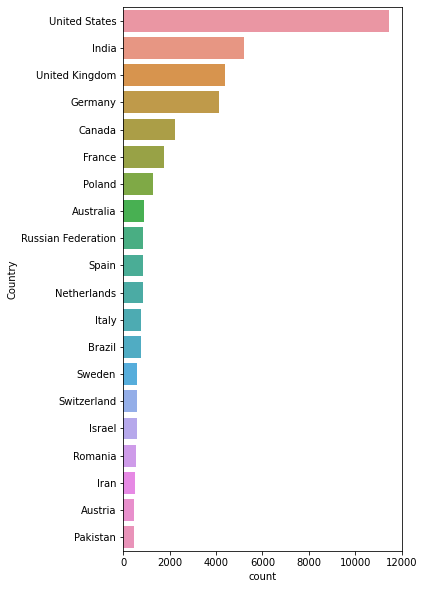

In [11]:
# Top 20 countries have user 
plt.figure(figsize=(5, 10))
sns.countplot(y = df["Country"], order=df["Country"].value_counts()[:20].index);


Almost user from USA and India do the survey on StackOverFlow

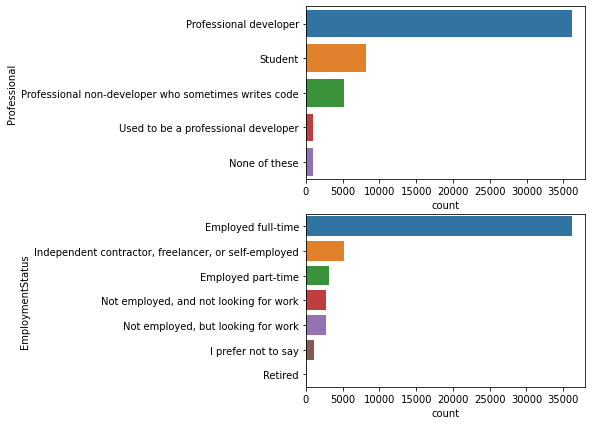

In [21]:
plt.figure(figsize=(5, 7))
plt.subplot(2,1,1)
sns.countplot(y = df["Professional"], order=df["Professional"].value_counts().index)
plt.subplot(2,1,2)
sns.countplot(y = df["EmploymentStatus"], order=df["EmploymentStatus"].value_counts().index);

User almost Professional Developer and they work full time

In [22]:
df["MajorUndergrad"].value_counts()

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

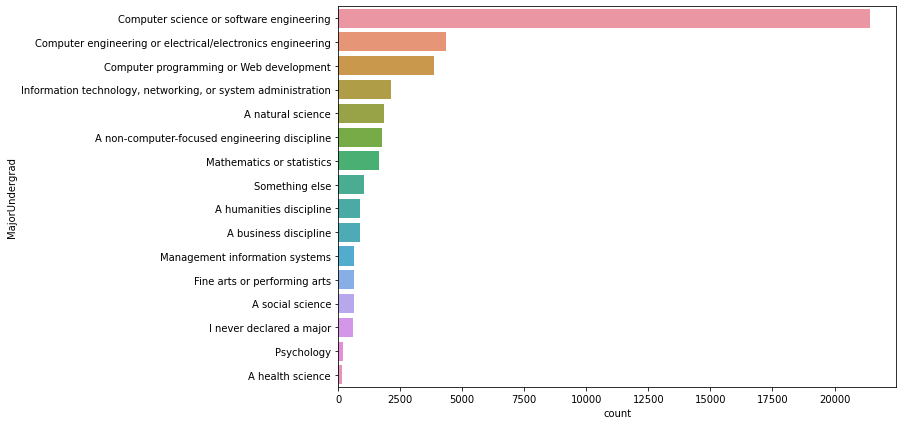

In [26]:
plt.figure(figsize=(10, 7))
sns.countplot(y = df["MajorUndergrad"], order=df["MajorUndergrad"].value_counts().index);

almost users are Students learn CS or CE. Beside there some people who learn fields which are non-IT like Math, statistic or Human

In [84]:
# Check null
null_per_cols = df.isnull().sum(axis=0)/df.shape[0]
null_per_cols["DeveloperType"]

0.29706958281444584

In [85]:
df["DeveloperType"].value_counts()

Web developer                                                                                                                                                                                                                                 10683
Web developer; Desktop applications developer                                                                                                                                                                                                  1849
Mobile developer                                                                                                                                                                                                                               1556
Web developer; Mobile developer                                                                                                                                                                                                                1503
Desktop applications dev

In [86]:
dev_type_rm = df.dropna(subset=["DeveloperType"], axis=0, how="any") # Drop na value in DevelopType

In [99]:
# Check number developer per role
develop_type = {}
sum_of_develop = 0
for jobs in dev_type_rm["DeveloperType"]:
    jobs = jobs.replace("; ", ";")
    for job in jobs.split(";"):
        if job not in develop_type:
            develop_type[job] = 1
        else:
            develop_type[job] += 1
        sum_of_develop += 1
# print(develop_type)
develop_type = pd.Series(develop_type.values(), index=develop_type.keys()).sort_values(ascending=False)
develop_type



Web developer                                            26235
Desktop applications developer                           10435
Mobile developer                                          8326
Database administrator                                    5192
Developer with a statistics or mathematics background     4091
Systems administrator                                     4086
DevOps specialist                                         4015
Embedded applications/devices developer                   3352
Data scientist                                            3045
Other                                                     2694
Graphics programming                                      1731
Graphic designer                                          1426
Machine learning specialist                               1379
Quality assurance engineer                                1252
dtype: int64

In [100]:
develop_type.index

Index(['Web developer', 'Desktop applications developer', 'Mobile developer',
       'Database administrator',
       'Developer with a statistics or mathematics background',
       'Systems administrator', 'DevOps specialist',
       'Embedded applications/devices developer', 'Data scientist', 'Other',
       'Graphics programming', 'Graphic designer',
       'Machine learning specialist', 'Quality assurance engineer'],
      dtype='object')

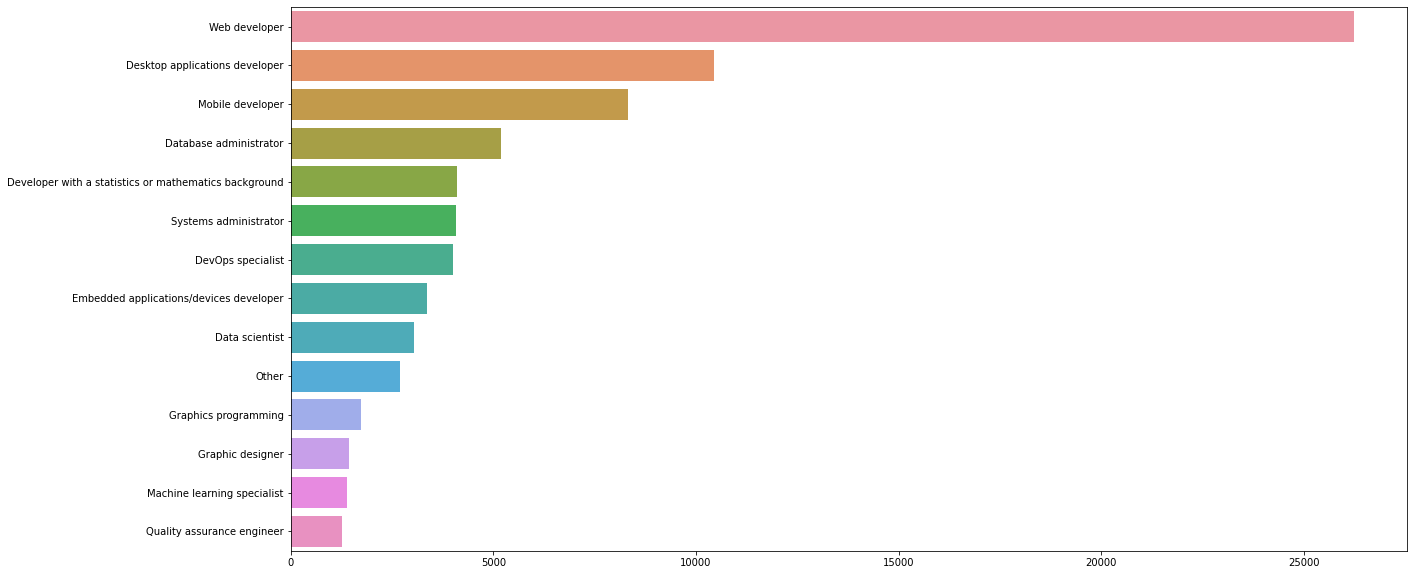

In [101]:
# (develop_type/sum_of_develop).plot(kind='bar')
# plt.title("What kind of develop are you?")
plt.figure(figsize=(20, 10))
sns.barplot(y=develop_type.index, x=develop_type);

We can see that almost developers work as a Web Developer, next is Desktop Application and Mobile

In [102]:
type_salary_rm = df.dropna(subset=["DeveloperType", "Salary"], axis=0, how="any")
# type_salary_rm[["DeveloperType", "Salary"]].info()
type_salary_rm["DeveloperType"].value_counts()

Web developer                                                                                                                                3988
Web developer; Desktop applications developer                                                                                                 676
Desktop applications developer                                                                                                                542
Mobile developer                                                                                                                              532
Web developer; Mobile developer                                                                                                               510
                                                                                                                                             ... 
Developer with a statistics or mathematics background; Data scientist; DevOps specialist; Quality assurance engineer        

In [103]:
# Check average salary per role
develop_salary = {}
develop_type = {}
for _, roles in type_salary_rm[["DeveloperType", "Salary"]].iterrows():
    jobs = roles["DeveloperType"]
    jobs = jobs.replace("; ", ";")
    salary = roles["Salary"]
    for job in jobs.split(";"):
        if job not in develop_salary:
            develop_salary[job] = salary
            develop_type[job] = 1
        else:
            develop_salary[job] += salary
            develop_type[job] += 1

for key, value in develop_salary.items():
    develop_salary[key] = value/develop_type[key]
# print(len(develop_salary))
develop_salary = pd.Series(develop_salary.values(), index=develop_salary.keys()).sort_values(ascending=False)
develop_salary

Other                                                    72344.574448
DevOps specialist                                        66158.200598
Machine learning specialist                              66023.099171
Developer with a statistics or mathematics background    62455.495840
Data scientist                                           61137.334460
Embedded applications/devices developer                  58524.353375
Quality assurance engineer                               56423.108379
Desktop applications developer                           56352.857031
Systems administrator                                    56331.936263
Web developer                                            54968.020118
Database administrator                                   53744.812433
Graphics programming                                     53212.892563
Mobile developer                                         50773.341749
Graphic designer                                         45964.054694
dtype: float64

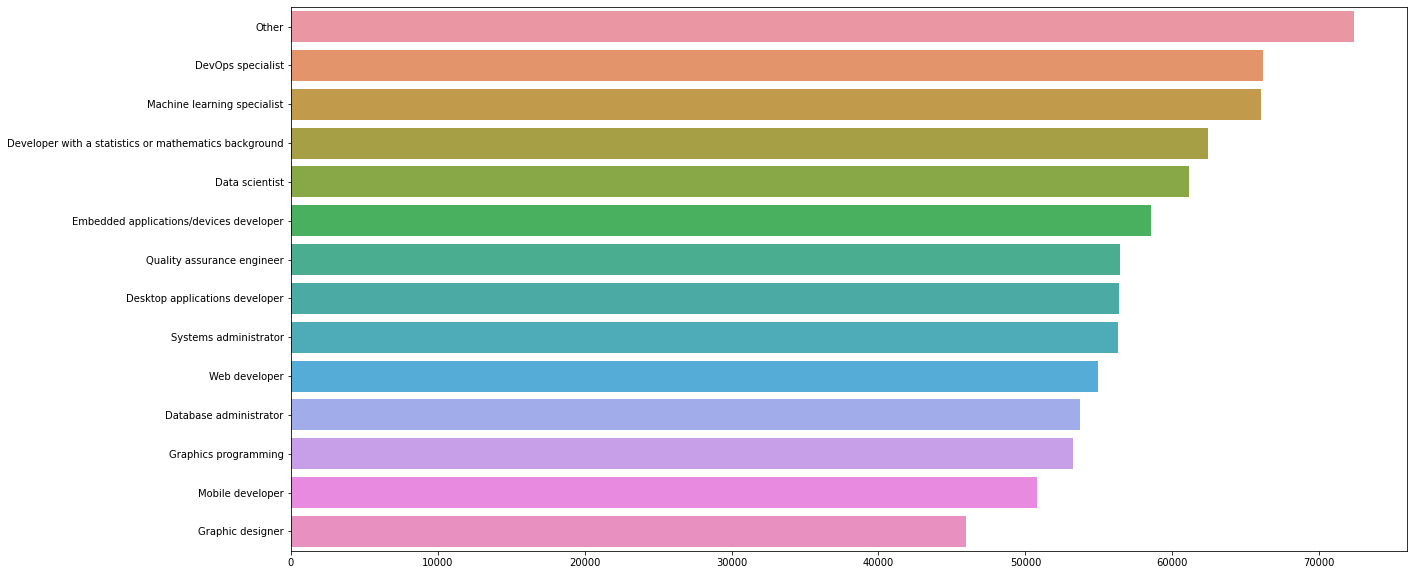

In [104]:
plt.figure(figsize=(20, 10))
sns.barplot(y=develop_salary.index, x=develop_salary);

We can see although almost users are Web Developer and Mobile Developer but it's salary is not too high. System Administrator and Machine learning Specialist have higher salary

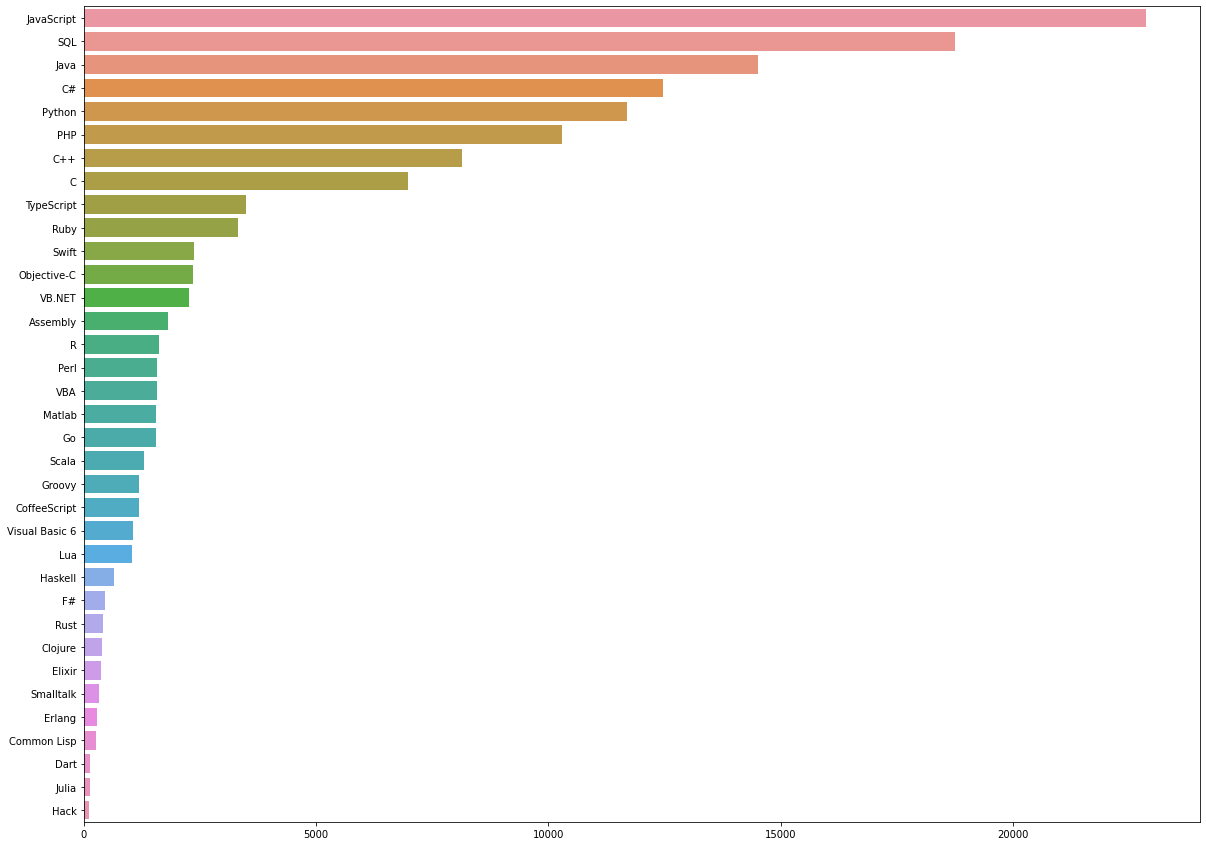

In [105]:
# Popular of Language and it's salary
language_rm = df.dropna(subset=["HaveWorkedLanguage"], axis=0)
languages = {}
sum_of_language = 0
for langs in language_rm["HaveWorkedLanguage"]:
    langs = langs.replace("; ", ";")
    for lang in langs.split(";"):
        if lang not in languages:
            languages[lang] = 1
        else:
            languages[lang] += 1
        sum_of_language += 1

languages = pd.Series(languages.values(), index=languages.keys()).sort_values(ascending=False)
plt.figure(figsize=(20, 15))
sns.barplot(y=languages.index, x=languages);

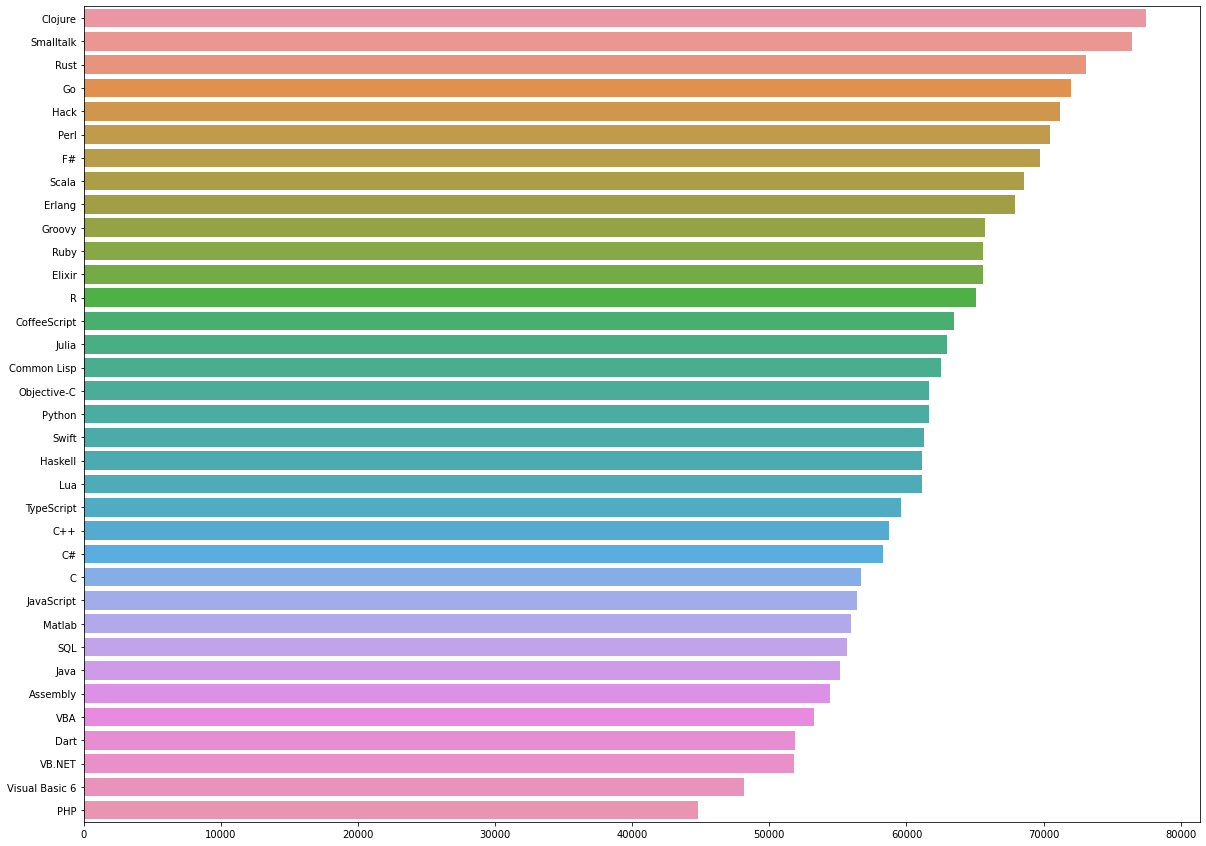

In [108]:
# Check average salary per role
lang_salary_rm = df.dropna(subset=["HaveWorkedLanguage", "Salary"], how="any", axis=0)
language_salary = {}
language_type = {}
for _, ins in lang_salary_rm[["HaveWorkedLanguage", "Salary"]].iterrows():
    langs = ins["HaveWorkedLanguage"]
    langs = langs.replace("; ", ";")
    salary = ins["Salary"]
    for lang in langs.split(";"):
        if lang not in language_salary:
            language_salary[lang] = salary
            language_type[lang] = 1
        else:
            language_salary[lang] += salary
            language_type[lang] += 1

for key, value in language_salary.items():
    language_salary[key] = value/language_type[key]
# print(len(develop_salary))
language_salary = pd.Series(language_salary.values(), index=language_salary.keys()).sort_values(ascending=False)
plt.figure(figsize=(20, 15))
sns.barplot(y=language_salary.index, x=language_salary);

Some new languages have very high salary such as Smalltalk, Rush, Go, ...

Some popular languages that user use currently are JavaScript, SQL and Java

In [114]:
def change(hour):
    if hour[0].isnumeric():
        hour, noon = hour.split(" ")
        hour = hour.split(":")[0]
        return int(hour) + (12 if noon == "PM" else 0)
    else:
        if hour == "Noon":
            return 12
        elif hour == "Midnight":
            return 24
        
hour_rm = df.dropna(subset=["WorkStart"], how="any", axis=0)
hour_rm["HourWork"] = hour_rm["WorkStart"].apply(change)
    

c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


9     9401
10    9091
8     7076
7     3364
11    2212
6     1216
12    1146
14     443
13     399
5      294
20     280
18     254
16     249
22     212
15     206
21     156
17     134
19     127
4      123
24      90
23      85
1       53
3       50
2       35
Name: HourWork, dtype: int64

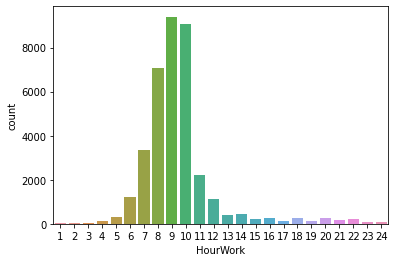

In [116]:
plt.figure()
sns.countplot(x=hour_rm["HourWork"]);

Developer usually start their work between 8 and 10am

In [111]:
df["WorkStart"].value_counts()

9:00 AM     9401
10:00 AM    9091
8:00 AM     7076
7:00 AM     3364
11:00 AM    2212
6:00 AM     1216
Noon        1146
2:00 PM      443
1:00 PM      399
5:00 AM      294
8:00 PM      280
6:00 PM      254
4:00 PM      249
10:00 PM     212
3:00 PM      206
9:00 PM      156
5:00 PM      134
7:00 PM      127
4:00 AM      123
Midnight      90
11:00 PM      85
1:00 AM       53
3:00 AM       50
2:00 AM       35
Name: WorkStart, dtype: int64

In [119]:
def compute_code_years(row):
    # return 1
    # return row.name
    if row.name == "Less than a year":
        return 0
    else:
        return int(row.name.split(" ")[0])

year_code = df.groupby("YearsCodedJob")[["JobSatisfaction", "Salary"]].mean()
# year_code.apply(lambda x: x.index, axis=0)
year_code["num_years"] = year_code.apply(compute_code_years, axis=1)
year_code = year_code.sort_values(by="num_years", ascending=False)

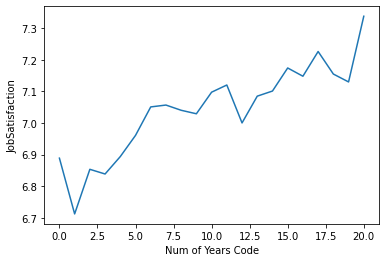

In [120]:
plt.figure()
plt.plot(year_code["num_years"], year_code["JobSatisfaction"])
plt.xlabel("Num of Years Code")
plt.ylabel("JobSatisfaction");

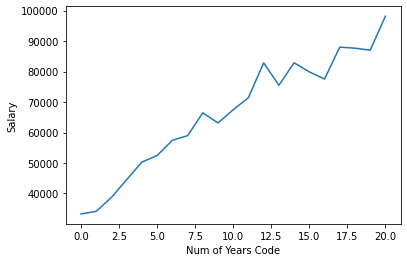

In [121]:
plt.figure()
plt.plot(year_code["num_years"], year_code["Salary"])
plt.xlabel("Num of Years Code")
plt.ylabel("Salary");


The longer developers works the more satisfied they will be and the higher their salary

In [122]:
understand = df.dropna(subset=["UnderstandComputers"], how="any", axis=0)
understand["Agree"] = understand.apply(lambda x: 1 if x["UnderstandComputers"] in ["Somewhat agree", "Agree", "Strongly agree"] else 0, axis=1)

c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
understand.groupby("Agree")["UnderstandComputers"].count() / understand.shape[0]

Agree
0    0.372145
1    0.627855
Name: UnderstandComputers, dtype: float64

Almost developer admit that they don't understand about computer too much